Кластеризация (англ. cluster analysis) — задача группировки множества объектов на подмножества (кластеры) таким образом, чтобы объекты из одного кластера были более похожи друг на друга, чем на объекты из других кластеров по какому-либо критерию. Задача кластеризации относится к классу задач обучения без учителя.

Данная группировка призвана выявить наиболее характерные черты объектов, относящихся к разным группам, чтобы в дальнейшем любой новый объект мог быть распознан (отнесен к одному из кластеров) в автоматическом режиме на базе выявленных критериев.

## Применение методов кластеризации  

В качестве примера возьмем классический набор данных ирисов Фишера. Датасет представляет набор из 150 записей с пятью атрибутами в следующем порядке: длина чашелистика (sepal length), ширина чашелистика (sepal width), длина лепестка (petal length), ширина лепестка (petal width) и класс, соответствующий одному из трех видов: Iris Setosa, Iris Versicolor или Iris Virginica, обозначенных соответственно 0, 1, 2. Наш алгоритм должен принимать четыре свойства одного конкретного цветка и предсказывать, к какому классу (виду ириса) он принадлежит. Имеющиеся в наборе данных метки можно использовать для оценки качества предсказания.

### k-means

Наиболее популярным алгоритмом кластеризации данных является метод k-средних. Это итеративный алгоритм кластеризации, основанный на минимизации суммарных квадратичных отклонений точек кластеров от центроидов (средних координат) этих кластеров.

Первоначально выбирается желаемое количество кластеров. Поскольку нам известно, что в нашем наборе данных есть 3 класса, установим параметр модели n_clusters равный трем.

Cлучайным образом из входных данных выбираются три элемента выборки, в соответствие которым ставятся три кластера, в каждый из которых теперь включено по одной точке, каждая при этом является центроидом этого кластера.

Ищем ближайшего соседа текущего центроида. Добавляем точку к соответствующему кластеру и пересчитываем положение центроида с учетом координат новых точек.  Алгоритм заканчивает работу, когда координаты каждого центроида перестают меняться. Центроид каждого кластера в результате представляет собой набор значений признаков, описывающих усредненные параметры выделенных классов.

Импортируем необходимые библиотеки. В datasets содержатся наборы данных, а в KMeans - метод кластеризации k-средних.

In [ ]:
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

Загружаем набор данных. Наиболее популярным для данной задачи является набор данных по ирисам Фишера.

In [ ]:
iris_df = datasets.load_iris()

Описываем модель и проводим моделирование. Зададим в качестве начального значения количество кластеров равное трем.

In [ ]:
model = KMeans(n_clusters=3)
model.fit(iris_df.data)

KMeans(n_clusters=3)

Получим предсказание на единичном примере и выведем результат на экран.

In [ ]:
predicted_label = model.predict([[7.2, 3.5, 0.8, 1.6]])
print(predicted_label)

[1]


Получим также предсказание на всем наборе данных и выведем результаты на экран.

In [ ]:
all_predictions = model.predict(iris_df.data)
print(all_predictions)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


Представление в формате простых чисел не совсем наглядно, поэтому попробуем графически представить результаты кластеризации.

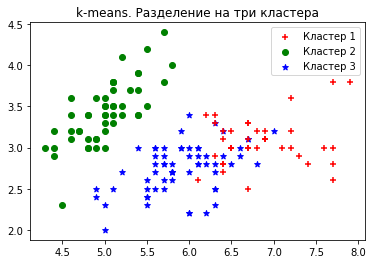

In [ ]:
for i in range(0, len(iris_df.data)):
    if all_predictions[i] == 0:
        c1 = plt.scatter(iris_df.data[i, 0], iris_df.data[i, 1], c='r', marker='+')
    elif all_predictions[i] == 1:
        c2 = plt.scatter(iris_df.data[i, 0], iris_df.data[i, 1], c='g', marker='o')
    elif all_predictions[i] == 2:
        c3 = plt.scatter(iris_df.data[i, 0], iris_df.data[i, 1], c='b', marker='*')

plt.legend([c1, c2, c3], ['Кластер 1', 'Кластер 2', 'Кластер 3'])
plt.title('k-means. Разделение на три кластера')
plt.show()

Так как параметров у наших данных 4, а график мы можем построить только по двум, то проведем небольшое исследование с целью установить, какие из параметров лучше использовать для визуализации для большей наглядности.

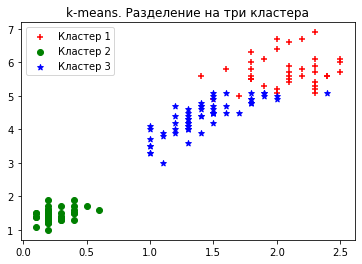

In [ ]:
for i in range(0, len(iris_df.data)):
    if all_predictions[i] == 0:
        c1 = plt.scatter(iris_df.data[i, 3], iris_df.data[i, 2], c='r', marker='+')
    elif all_predictions[i] == 1:
        c2 = plt.scatter(iris_df.data[i, 3], iris_df.data[i, 2], c='g', marker='o')
    elif all_predictions[i] == 2:
        c3 = plt.scatter(iris_df.data[i, 3], iris_df.data[i, 2], c='b', marker='*')

plt.legend([c1, c2, c3], ['Кластер 1', 'Кластер 2', 'Кластер 3'])
plt.title('k-means. Разделение на три кластера')
plt.show()

На основе двух представленных выше графиков можем предположить, что наилучшей будет визуализация результатов через нулевой и второй параметры, так как наиболее просто провести границу между кластерами именно по указанным осям. Ниже можно увидеть экспериментальное подтверждение данной теории.

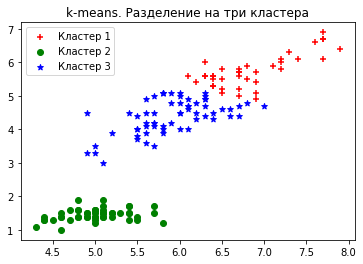

In [ ]:
for i in range(0, len(iris_df.data)):
    if all_predictions[i] == 0:
        c1 = plt.scatter(iris_df.data[i, 0], iris_df.data[i, 2], c='r', marker='+')
    elif all_predictions[i] == 1:
        c2 = plt.scatter(iris_df.data[i, 0], iris_df.data[i, 2], c='g', marker='o')
    elif all_predictions[i] == 2:
        c3 = plt.scatter(iris_df.data[i, 0], iris_df.data[i, 2], c='b', marker='*')

plt.legend([c1, c2, c3], ['Кластер 1', 'Кластер 2', 'Кластер 3'])
plt.title('k-means. Разделение на три кластера')
plt.show()

А что если мы не знаем заранее количество кластеров, на которые нам необходимо разбить множество наших записей?

Для метода k-средних придется перебирать все варианты, начинаю от двух кластеров и далее, так как задача кластеризации тем и отличается от классификации, что иы не знаем об мтоговом числе кластеров.

Попробуем провести исследование для значений количества кластеров 2, 4 и 5.

In [ ]:
model = KMeans(n_clusters=2)
model.fit(iris_df.data)
all_predictions = model.predict(iris_df.data)
print(all_predictions)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


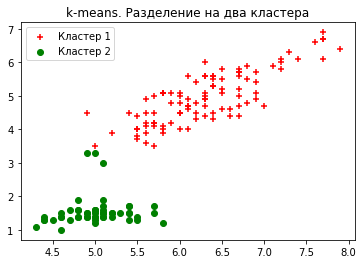

In [ ]:
for i in range(0, len(iris_df.data)):
    if all_predictions[i] == 0:
        c1 = plt.scatter(iris_df.data[i, 0], iris_df.data[i, 2], c='r', marker='+')
    elif all_predictions[i] == 1:
        c2 = plt.scatter(iris_df.data[i, 0], iris_df.data[i, 2], c='g', marker='o')

plt.legend([c1, c2], ['Кластер 1', 'Кластер 2'])
plt.title('k-means. Разделение на два кластера')
plt.show()

In [ ]:
model = KMeans(n_clusters=4)
model.fit(iris_df.data)
all_predictions = model.predict(iris_df.data)
print(all_predictions)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 3 0 3 0 3 0 3 3 3 3 0 3 0 0 3 0 3 0 3 0 0
 0 0 0 0 0 3 3 3 3 0 3 0 0 0 3 3 3 0 3 3 3 3 3 0 3 3 2 0 2 2 2 2 3 2 2 2 0
 0 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 0
 2 0]


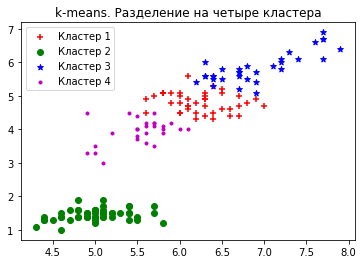

In [ ]:
for i in range(0, len(iris_df.data)):
    if all_predictions[i] == 0:
        c1 = plt.scatter(iris_df.data[i, 0], iris_df.data[i, 2], c='r', marker='+')
    elif all_predictions[i] == 1:
        c2 = plt.scatter(iris_df.data[i, 0], iris_df.data[i, 2], c='g', marker='o')
    elif all_predictions[i] == 2:
        c3 = plt.scatter(iris_df.data[i, 0], iris_df.data[i, 2], c='b', marker='*')
    elif all_predictions[i] == 3:
        c4 = plt.scatter(iris_df.data[i, 0], iris_df.data[i, 2], c='m', marker='.')

plt.legend([c1, c2, c3, c4], ['Кластер 1', 'Кластер 2', 'Кластер 3', 'Кластер 4'])
plt.title('k-means. Разделение на четыре кластера')
plt.show()

In [ ]:
model = KMeans(n_clusters=5)
model.fit(iris_df.data)
all_predictions = model.predict(iris_df.data)
print(all_predictions)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 4 0 0 0 4 0 4 4 0 4 0 4 0 0 4 0 4 0 4 0 0
 0 0 0 0 0 4 4 4 4 0 4 0 0 0 4 4 4 0 4 4 4 4 4 0 4 4 3 0 2 3 3 2 4 2 3 2 3
 3 3 0 3 3 3 2 2 0 3 0 2 0 3 2 0 0 3 2 2 2 3 0 0 2 3 3 0 3 3 3 0 3 3 3 0 3
 3 0]


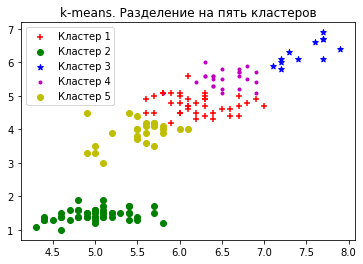

In [ ]:
for i in range(0, len(iris_df.data)):
    if all_predictions[i] == 0:
        c1 = plt.scatter(iris_df.data[i, 0], iris_df.data[i, 2], c='r', marker='+')
    elif all_predictions[i] == 1:
        c2 = plt.scatter(iris_df.data[i, 0], iris_df.data[i, 2], c='g', marker='o')
    elif all_predictions[i] == 2:
        c3 = plt.scatter(iris_df.data[i, 0], iris_df.data[i, 2], c='b', marker='*')
    elif all_predictions[i] == 3:
        c4 = plt.scatter(iris_df.data[i, 0], iris_df.data[i, 2], c='m', marker='.')
    elif all_predictions[i] == 4:
        c5 = plt.scatter(iris_df.data[i, 0], iris_df.data[i, 2], c='y', marker='o')

plt.legend([c1, c2, c3, c4, c5], ['Кластер 1', 'Кластер 2', 'Кластер 3', 'Кластер 4', 'Кластер 5'])
plt.title('k-means. Разделение на пять кластеров')
plt.show()

Проведенное нами исследование с методом k-means в основе показало, что наилучшим образом разделение на кластеры происходит при количестве равном 2. Несмотря на то, что правильным ответом в данном задании является три кластера, лучших результатов наша модель достигает при разделении всех записей на два класса.

Данный вывод подтвердит также метод DBSCAN, приведенный ниже.

## DBSCAN

DBSCAN (Density-Based Spatial Clustering of Applications with Noise, плотностной алгоритм пространственной кластеризации с присутствием шума) – популярный алгоритм кластеризации, используемый в анализе данных в качестве одной из замен метода k-средних.

Метод не требует предварительных предположений о числе кластеров, но нужно настроить два других параметра: eps и min_samples. Данные параметры – это соответственно максимальное расстояние между соседними точками и минимальное число точек в окрестности (количество соседей), когда можно говорить, что эти экземпляры данных образуют один кластер.

Импортируем необходимые библиотеки и загружаем набор данных.

In [ ]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

iris = load_iris()

Создаем модель и проводим обучение.

In [ ]:
dbscan = DBSCAN()

dbscan.fit(iris.data)

DBSCAN()

Уменьшаем размерность при помощи метода главных компонент.

In [ ]:
pca = PCA(n_components=2).fit(iris.data)
pca_2d = pca.transform(iris.data)

Строим графическое представление результатов кластеризации.

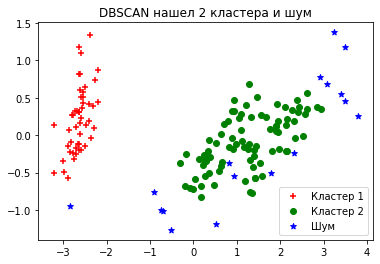

In [ ]:
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
    elif dbscan.labels_[i] == -1:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='*')

plt.legend([c1, c2, c3], ['Кластер 1', 'Кластер 2', 'Шум'])
plt.title('DBSCAN нашел 2 кластера и шум')
plt.show()

## Применение методов кластеризации (Практическая часть)

Вашим заданием на данную лабораторную станет кластеризация набора данных о покупках клиентов в супермаркете.

Вы владеете торговым центром в супермаркете, и через членские карты у вас есть некоторые основные данные о ваших клиентах, такие как идентификатор клиента, возраст, пол, годовой доход и оценка расходов. Вам необходимо понимание того, кого можно легко объединить, чтобы можно было передать указания маркетинговой команде и соответствующим образом спланировать стратегию проведения акций.

Необходимо провести исследование набора данных на то, по каким данным Вы будете проводить визуализацию и на оптимальное количество кластеров (порядок проведения исследования приведен в теоретической части).

## **SOlution**

In [ ]:
%%capture
!wget https://www.dropbox.com/s/3uoupxpfvhtr7wg/Mall_Customers.csv

In [ ]:
#importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
df = pd.read_csv('Mall_Customers.csv')
del df['CustomerID']

In [ ]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


Количество столбцов и строк в наборе данных

In [ ]:
# כמה לקוחות
print('There are {} customers.'.format(len(df)))

There are 200 customers.


Просмотреть основную информацию о наборе данных
#basic info

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


нет пропущенных значений нет

In [ ]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


Проверka нулевыx значения

In [ ]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

comparing amount of  Male-Female clients

In [ ]:
df.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

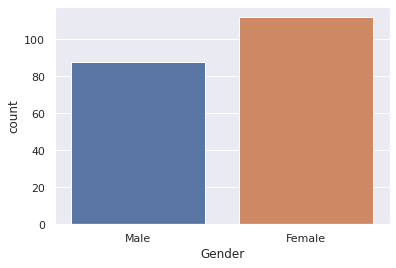

In [ ]:
sns.set()
sns.countplot(x=df.Gender,data=df)
plt.show()

Распределение по возрасту, годовому доходу и оценке расходов клиентов


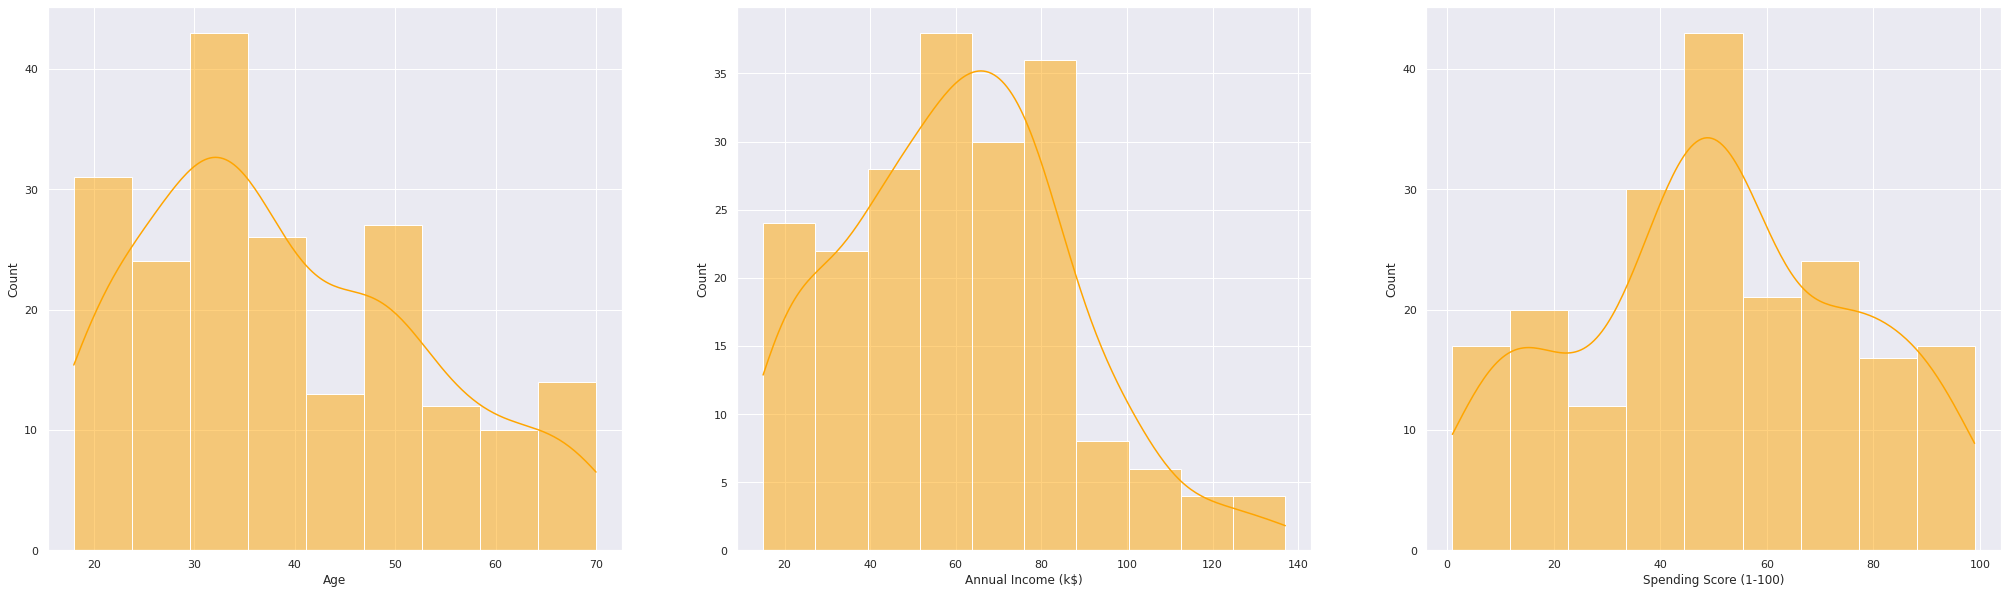

In [ ]:
plt.figure(figsize = (35,10))

plt.subplot(1, 3, 1)
sns.histplot(df['Age'],kde=True,color='orange')

plt.subplot(1, 3, 2)
sns.histplot(df['Annual Income (k$)'],kde=True,color='orange')

plt.subplot(1, 3, 3)
sns.histplot(df['Spending Score (1-100)'],kde=True,color='orange')

plt.show()

В столбцах «Age»  возраст  почти всех клиентов  от 20 до 50 лет

Max  оценка расходов : 50
Максимальный годовой доход : от 45 до 90 тысяч



 возраст и расходы Связь

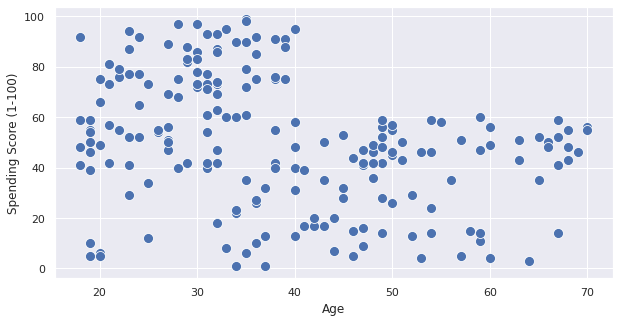

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df.Age,y=df['Spending Score (1-100)'],s=100)

**Расхды Молодых больше чем пожилых**


---



## **Relationship between age and annual income by gender**

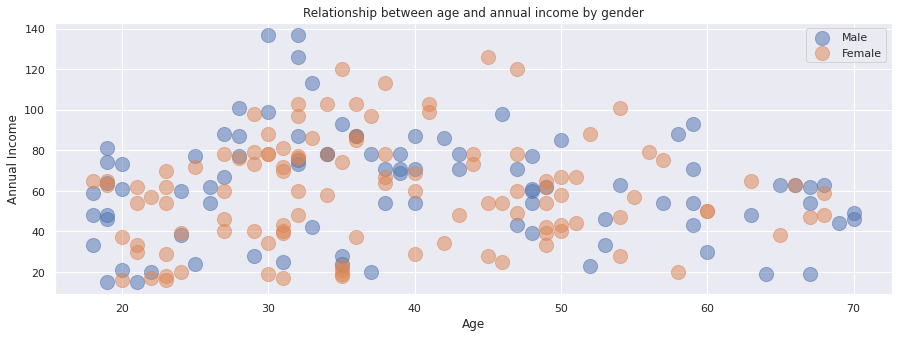

In [ ]:
plt.figure(1 , figsize = (15 , 5))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Annual Income (k$)' , data = df[df['Gender'] == gender] ,
                s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.title('Relationship between age and annual income by gender')
plt.legend()
plt.show()

Relationship between estimated spending and annual income by **Gender**

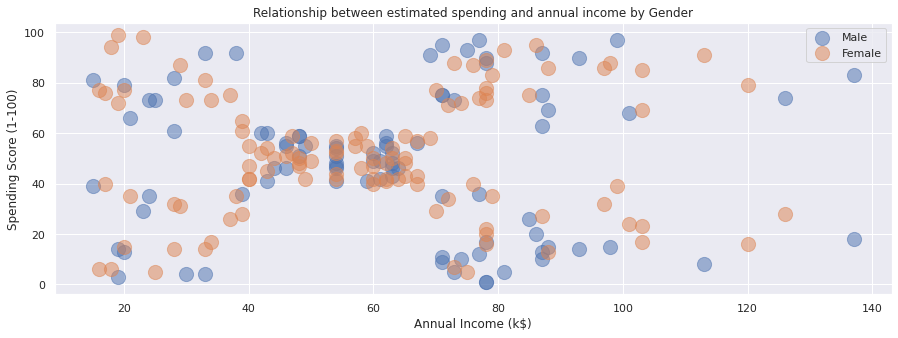

In [ ]:
plt.figure(1 , figsize = (15 , 5))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)' ,
                data = df[df['Gender'] == gender] ,s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)')
plt.title('Relationship between estimated spending and annual income by Gender')
plt.legend()
plt.show()

***K- means method***


 Сегментация с использованием «Годового дохода» и «Оценки расходов»

In [ ]:
X= df.iloc[:, [2,3]].values

Аlgorithm K-Means to determine the optimal number of clusters, K-Means using the Elbow method

In [ ]:
clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)
#inertia_ — это формула, используемая для разделения точек данных на кластеры

 ELBOW Method Visualation для получения оптимального значения K  

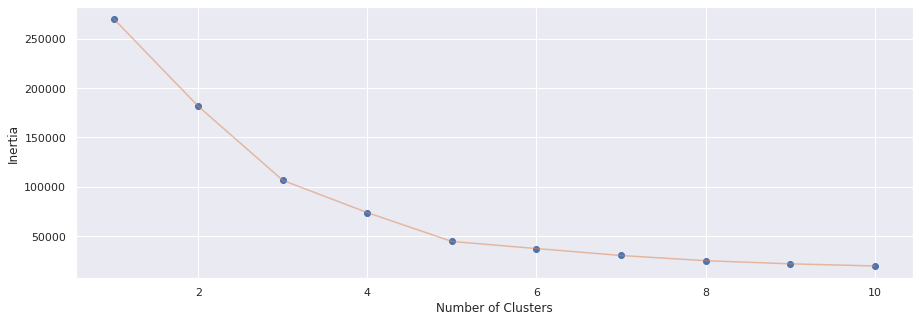

In [ ]:
plt.figure(1 , figsize = (15 ,5))
plt.plot(np.arange(1 , 11) , clusters , 'o')
plt.plot(np.arange(1 , 11) , clusters , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

in result -> **K = 5**

In [ ]:
model = KMeans(n_clusters= 5)
model.fit(X)
ykmean = model.predict(X)
ykmean

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 2,
       4, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 1, 2, 1, 3, 1, 3, 1,
       2, 1, 3, 1, 3, 1, 3, 1, 3, 1, 2, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

All Clusters Visualation

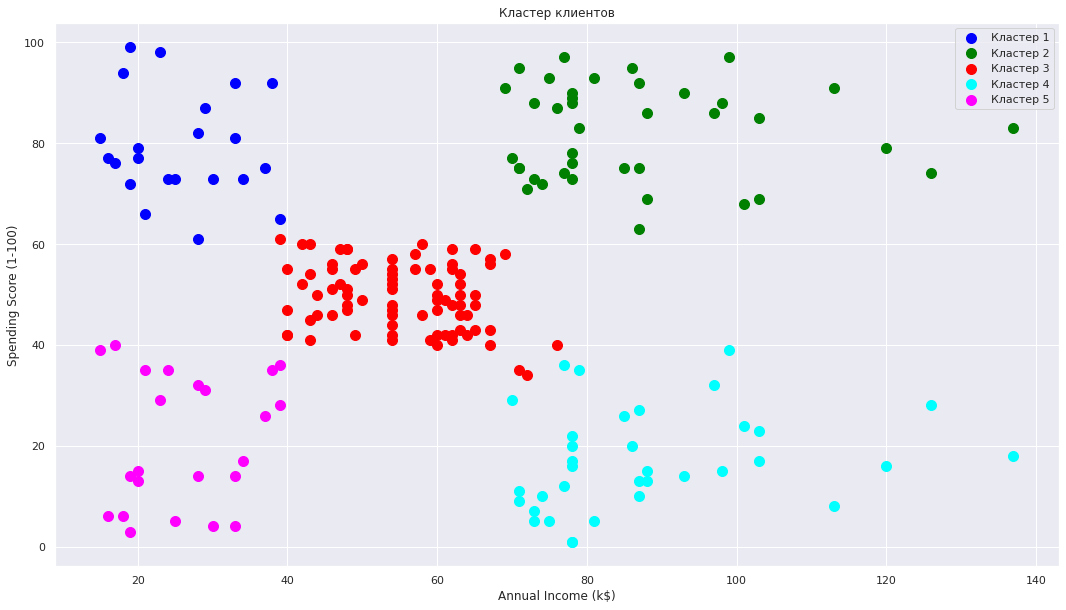

In [ ]:
plt.figure(1 , figsize = (18 , 10))

plt.scatter(X[ykmean == 0, 0], X[ykmean == 0, 1], s = 100, c = 'blue', label = 'Кластер 1')
plt.scatter(X[ykmean == 1, 0], X[ykmean == 1, 1], s = 100, c = 'green', label = 'Кластер 2')
plt.scatter(X[ykmean == 2, 0], X[ykmean == 2, 1], s = 100, c = 'red', label = 'Кластер 3')
plt.scatter(X[ykmean == 3, 0], X[ykmean == 3, 1], s = 100, c = 'cyan', label = 'Кластер 4')
plt.scatter(X[ykmean == 4, 0], X[ykmean == 4, 1], s = 100, c = 'magenta', label = 'Кластер 5')

plt.title('Кластер клиентов')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

**Вывод**

Кластер 1 (**синий** цвет) это низкий доход и высокие расходы

кластер 2 (**зеленый** цвет) это высокий доход и низкие расходы

кластер 3 (**Красный** цвет) это высокие доходы и высокие расходы

кластер 4 (**голубой** цвет) это низкий доход и низкие расходы

кластер 5 (**пурпурный** цвет) это средний доход и средние расходы
